1. Problem Statement

This dataset provides comprehensive sales information from two distinct stores, namely ExcelMart and MecStore, operating across various states. Each entry records the sales activity of specific merchandise within a particular state and store. The dataset captures the diversity of products offered by each store, reflecting their unique inventory and sales performance across different regions.

2. Data Collection <br>
2.1 Import Data and Required Collection

In [32]:
import pandas as pd
df_train=pd.read_csv("train.csv")

In [3]:
df_train.head()

,row_id,date,state,store,product,num_sold
0,0.0,01-01-2015,Kerala,ExcelMart,Mec Mug,329.0
1,1.0,01-01-2015,Kerala,ExcelMart,Mec Hat,520.0
2,2.0,01-01-2015,Kerala,ExcelMart,Mec Sticker,146.0
3,3.0,01-01-2015,Kerala,MecStore,Mec Mug,572.0
4,4.0,01-01-2015,Kerala,MecStore,Mec Hat,911.0


In [4]:
df_train.shape

(24590, 6)

The dataset contains 24590 rows and 6 columns.

<h2>2.2 Dataset information</h2>
This file serves as the training set and contains detailed sales data, including the date of sale, state, store name, product type, and quantity of items sold. Each row represents a transaction, showcasing the variety of products sold by each store in different states over time. <br>
1. date of the sale <br>
2. State <br>
3. Store name <br>
4. Product type <br>
5. Quantity of items sold

In [5]:
df_test=pd.read_csv("test.csv")

In [6]:
df_test.head

<bound method NDFrame.head of       row_id        date  state      store      product
0      22297  23-05-2018  Delhi  ExcelMart      Mec Hat
1      22298  23-05-2018  Delhi  ExcelMart  Mec Sticker
2      22299  23-05-2018  Delhi   MecStore      Mec Mug
3      22300  23-05-2018  Delhi   MecStore      Mec Hat
4      22301  23-05-2018  Delhi   MecStore  Mec Sticker
...      ...         ...    ...        ...          ...
3995   26293  31-12-2018  Delhi  ExcelMart      Mec Hat
3996   26294  31-12-2018  Delhi  ExcelMart  Mec Sticker
3997   26295  31-12-2018  Delhi   MecStore      Mec Mug
3998   26296  31-12-2018  Delhi   MecStore      Mec Hat
3999   26297  31-12-2018  Delhi   MecStore  Mec Sticker

[4000 rows x 5 columns]>

In [1]:
from pycaret.regression import *

In [16]:
categoricals=['date','state','store','product']
ignore=['row_id']
numericals=['num_sold']

In [12]:
df_train.nunique()

row_id      22297
date         1239
state           3
store           2
product         3
num_sold     1347
dtype: int64

In [13]:
df_train.isna()

,row_id,date,state,store,product,num_sold
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
24585,True,True,True,True,True,True
24586,True,True,True,True,True,True
24587,True,True,True,True,True,True
24588,True,True,True,True,True,True


In [28]:
print(df_test.shape)
print(df_train.shape)

(4000, 5)
(22297, 5)


In [19]:
df_train.dropna(subset=['num_sold'], inplace=True)

In [30]:
exp= RegressionExperiment()
exp.setup(data=df_train, ignore_features=ignore, target='num_sold', session_id=555, train_size=0.7,
categorical_features=categoricals,
categorical_imputation='mode', preprocess=True, normalize=True, remove_outliers=True, ordinal_features=None
)


,Description,Value
0,Session id,555
1,Target,num_sold
2,Target type,Regression
3,Original data shape,"(22297, 5)"
4,Transformed data shape,"(21518, 9)"
5,Transformed train set shape,"(14828, 9)"
6,Transformed test set shape,"(6690, 9)"
7,Ignore features,1
8,Categorical features,4
9,Preprocess,True


 # Compare Models

In [31]:
top3_exp=exp.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,48.4230,7091.0487,84.1197,0.8988,0.1500,0.1135,1.7080
lightgbm,Light Gradient Boosting Machine,48.9375,7225.5597,84.9216,0.8968,0.1513,0.1150,0.3640
gbr,Gradient Boosting Regressor,50.1817,7316.4205,85.4331,0.8955,0.1647,0.1202,0.3460
knn,K Neighbors Regressor,53.2428,8185.4682,90.3929,0.8831,0.1650,0.1261,0.1870
rf,Random Forest Regressor,57.1797,9192.8103,95.7828,0.8688,0.1785,0.1364,0.7820
et,Extra Trees Regressor,60.0919,9962.9166,99.7167,0.8578,0.1889,0.1445,0.5870
dt,Decision Tree Regressor,64.3033,11081.6543,105.1768,0.8418,0.2022,0.1556,0.1680
lr,Linear Regression,80.8092,13978.3781,118.1628,0.8003,0.5262,0.2704,1.7170
br,Bayesian Ridge,80.7741,13988.7615,118.2063,0.8002,0.5246,0.2699,0.1700
lar,Least Angle Regression,80.7755,13988.0223,118.2032,0.8002,0.5246,0.2700,0.1720


In [33]:
catboost=exp.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.5438,7695.9650,87.7266,0.8931,0.1564,0.1177
1,46.5301,6004.4895,77.4886,0.9082,0.1462,0.1124
2,49.6498,7373.0471,85.8664,0.8945,0.1525,0.1150
3,48.7455,6995.1916,83.6373,0.9021,0.1472,0.1115
4,47.7539,7203.5390,84.8737,0.8982,0.1518,0.1130
5,45.3723,6075.2125,77.9436,0.9110,0.1422,0.1081
6,48.6100,7711.6352,87.8159,0.8922,0.1514,0.1163
7,49.9525,7845.3150,88.5738,0.8873,0.1533,0.1160
8,46.8641,6524.4958,80.7744,0.9059,0.1460,0.1107


In [34]:
tune_catboost=exp.tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.3676,7657.3975,87.5066,0.8936,0.1552,0.1173
1,46.8993,6070.3932,77.9127,0.9072,0.1464,0.1129
2,49.5232,7261.8608,85.2166,0.8961,0.1523,0.1147
3,48.6463,6735.6757,82.0712,0.9057,0.1469,0.1123
4,48.2392,7238.1349,85.0772,0.8977,0.1531,0.1143
5,45.6096,6141.9720,78.3707,0.9100,0.1428,0.1087
6,48.6465,7585.9574,87.0974,0.8939,0.1510,0.1167
7,50.2207,7748.7307,88.0269,0.8887,0.1528,0.1168
8,47.5034,6585.5896,81.1516,0.9051,0.1475,0.1130


Fitting 10 folds for each of 10 candidates, totalling 100 fits


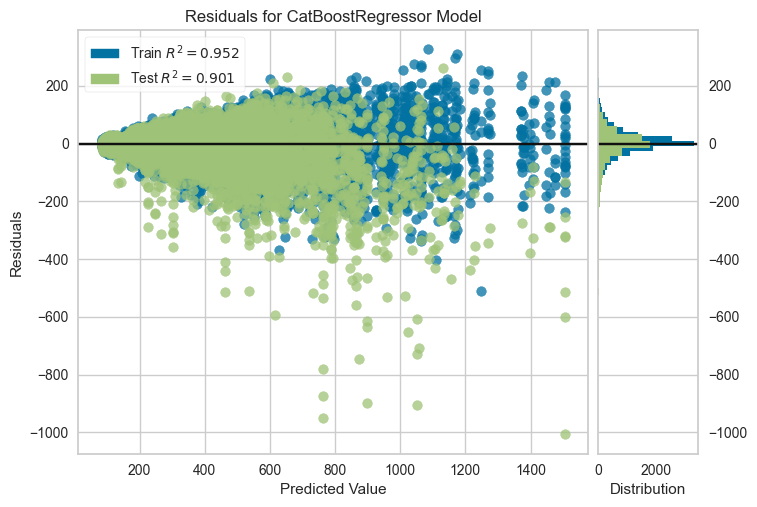

In [35]:
exp.plot_model(tune_catboost)

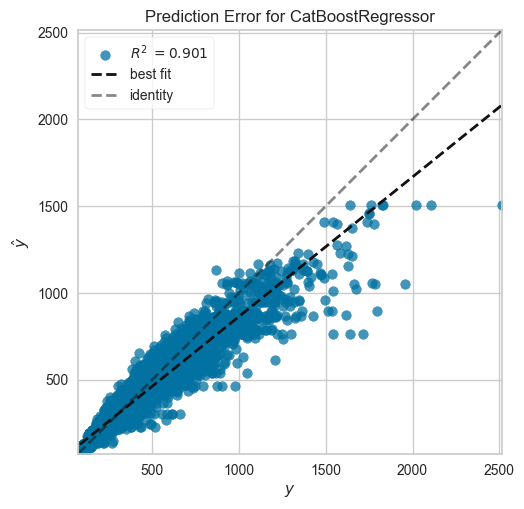

In [36]:
exp.plot_model(tune_catboost, plot='error')

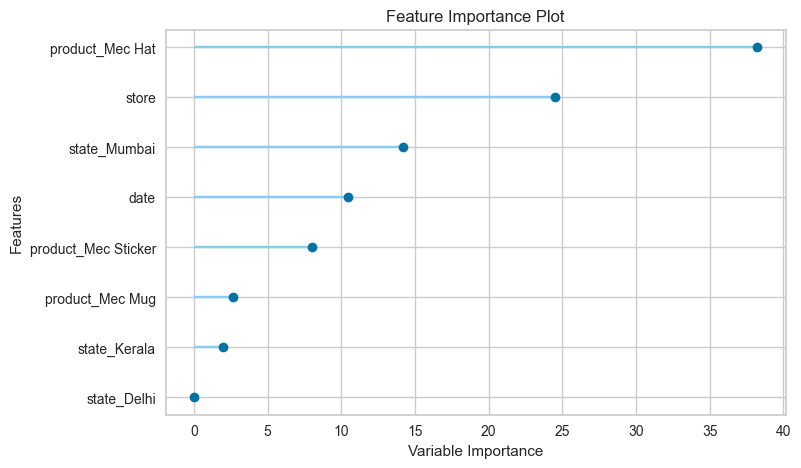

In [37]:
exp.plot_model(tune_catboost, plot='feature')

In [38]:
exp.plot_model(tune_catboost, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,260
sampling_frequency,PerTree
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant


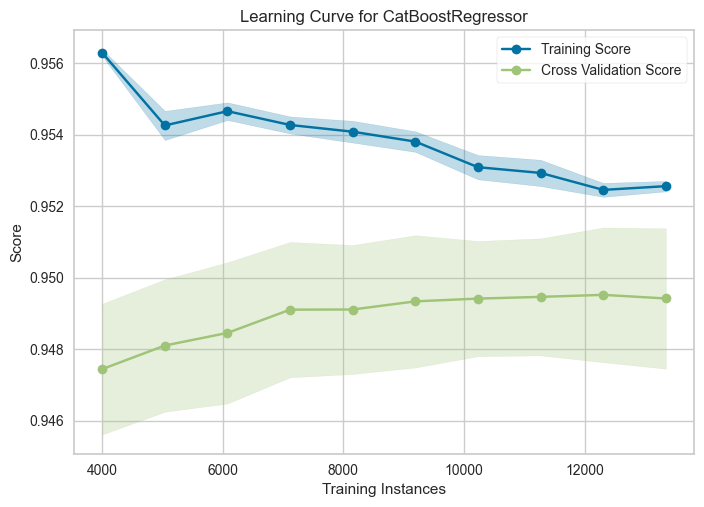

In [39]:
exp.plot_model(tune_catboost, plot='learning')

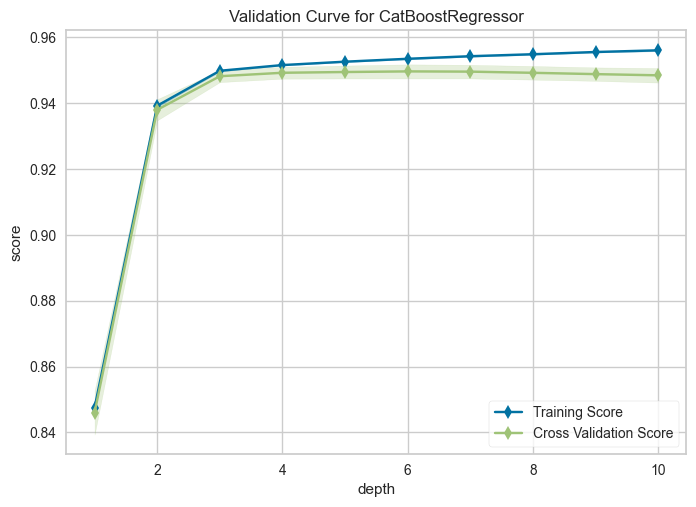

In [40]:
exp.plot_model(tune_catboost, plot='vc')

In [ ]:
exp.plot_model(tune_catboost, plot='manifold')